In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")
import plotly.graph_objects as go
from plotly.subplots import make_subplots


C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\324813220.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [12]:
data = pd.read_csv("immobilier_france.csv")

In [135]:
departement = data[data["departement"]==35]

# Data processing 


In [136]:
departement.shape


(142912, 23)

In [137]:
departement.isnull().sum()


Unnamed: 0                    0
id_transaction                0
date_transaction              0
prix                          0
departement                   0
id_ville                      0
ville                         0
code_postal                   0
adresse                       0
type_batiment                 0
vefa                          0
n_pieces                      0
surface_habitable             0
id_parcelle_cadastre          0
latitude                      0
longitude                     0
surface_dependances           0
surface_locaux_industriels    0
surface_terrains_agricoles    0
surface_terrains_sols         0
surface_terrains_nature       0
surface_totale                0
prix_m2                       0
dtype: int64

In [138]:
departement.dtypes


Unnamed: 0                      int64
id_transaction                  int64
date_transaction               object
prix                          float64
departement                     int64
id_ville                        int64
ville                          object
code_postal                     int64
adresse                        object
type_batiment                  object
vefa                             bool
n_pieces                        int64
surface_habitable               int64
id_parcelle_cadastre           object
latitude                      float64
longitude                     float64
surface_dependances           float64
surface_locaux_industriels    float64
surface_terrains_agricoles    float64
surface_terrains_sols         float64
surface_terrains_nature       float64
surface_totale                float64
prix_m2                       float64
dtype: object

In [139]:
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].str.replace(r'{|}', '')
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_locaux_industriels'] = pd.to_numeric(departement['surface_locaux_industriels'], errors='coerce')
departement['surface_locaux_industriels'] = departement['surface_locaux_industriels'].fillna(0)
departement['surface_dependances'] = departement['surface_dependances'].str.replace(r'{|}', '')
departement['surface_dependances'] = departement['surface_dependances'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_dependances'] = pd.to_numeric(departement['surface_dependances'], errors='coerce')
departement['surface_dependances'] = departement['surface_dependances'].fillna(0)
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].str.replace(r'{|}', '')
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_agricoles'] = pd.to_numeric(departement['surface_terrains_agricoles'], errors='coerce')
departement['surface_terrains_agricoles'] = departement['surface_terrains_agricoles'].fillna(0)
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].str.replace(r'{|}', '')
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_sols'] = pd.to_numeric(departement['surface_terrains_sols'], errors='coerce')
departement['surface_terrains_sols'] = departement['surface_terrains_sols'].fillna(0)
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].str.replace(r'{|}', '')
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].apply(lambda x: x if isinstance(x, str) and x.strip() != '' else '0')
departement['surface_terrains_nature'] = pd.to_numeric(departement['surface_terrains_nature'], errors='coerce')
departement['surface_terrains_nature'] = departement['surface_terrains_nature'].fillna(0)


AttributeError: Can only use .str accessor with string values!

In [140]:
departement["surface_totale"]=departement["surface_habitable"]+departement["surface_locaux_industriels"]+departement["surface_dependances"]+departement["surface_terrains_agricoles"]+departement["surface_terrains_sols"]+departement["surface_terrains_nature"]

C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\3671938087.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
departement.nunique()


Unnamed: 0                    142912
id_transaction                142912
date_transaction                2746
prix                           18673
departement                        1
id_ville                         345
ville                            357
code_postal                       80
adresse                        77864
type_batiment                      2
vefa                               2
n_pieces                          22
surface_habitable                403
id_parcelle_cadastre           79718
latitude                       79670
longitude                      79670
surface_dependances                6
surface_locaux_industriels       452
surface_terrains_agricoles      3758
surface_terrains_sols           3385
surface_terrains_nature          723
surface_totale                  5834
prix_m2                        78000
dtype: int64

In [142]:
print(departement['surface_habitable'].value_counts(),'\n', departement['n_pieces'].value_counts(),'\n', departement['code_postal'].value_counts(),'\n', departement['type_batiment'].value_counts())


65     2688
60     2510
80     2431
64     2421
66     2354
       ... 
416       1
367       1
289       1
428       1
319       1
Name: surface_habitable, Length: 403, dtype: int64 
 3     33347
4     32433
5     25451
2     23522
6     11010
1     10860
7      3918
8      1252
9       435
0       343
10      173
11       87
12       40
13       16
14       11
15        5
22        3
25        2
26        1
16        1
32        1
19        1
Name: n_pieces, dtype: int64 
 35000    22956
35400     9819
35700     6675
35200     6506
35800     4280
         ...  
35134      299
35113      252
35870      194
35960      182
35114      136
Name: code_postal, Length: 80, dtype: int64 
 Maison         80183
Appartement    62729
Name: type_batiment, dtype: int64


In [21]:
#from shapely.geometry import Point, Polygon

# Coordonnées de l'adresse
#adresse_coord = Point(48.131687, -1.692182)  # Exemple de coordonnées de Paris, France

# Définir les coordonnées du quartier lambda sous forme de polygone (exemple)
#quartier_lambda = Polygon([(-1.691197797465471, 48.133352271301035), (48.86, 2.35), (48.86, 2.36), (48.85, 2.36)])

# Vérifier si l'adresse se trouve à l'intérieur du quartier lambda
#appartient_au_quartier = adresse_coord.within(quartier_lambda)

#if appartient_au_quartier:
#    print("L'adresse appartient au quartier lambda.")
#else:
#    print("L'adresse n'appartient pas au quartier lambda.")


In [117]:
print(departement["n_pieces"].unique())


[ 3  6  8  4  2  5  1  0  7  9 10 12 11 14 22 26 16 15 13 25 32 19]


# Analyse du département

In [143]:
departement

,Unnamed: 0,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,...,id_parcelle_cadastre,latitude,longitude,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_totale,prix_m2
2523639,2523639,4830623,2014-01-02,50000.000000,35,288,SAINT-MALO,35400,18 RUE MONTAGNE ST JOSEPH,Appartement,...,35288000VS0014,48.645452,-1.984703,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1000.000000
2523640,2523640,4826227,2014-01-02,357000.000000,35,238,RENNES,35000,23 RUE LESAGE,Appartement,...,35238000BE0546,48.117227,-1.674441,0.000000,0.000000,0.000000,0.000000,0.000000,129.000000,2767.441860
2523641,2523641,4840520,2014-01-02,121000.000000,35,238,RENNES,35000,35 BD MARBEUF,Appartement,...,35238000AI0026,48.109764,-1.705560,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1951.612903
2523642,2523642,4833510,2014-01-02,75000.000000,35,127,GUIGNEN,35580,50 RUE GICQUEL,Maison,...,35127000XH0343,47.921452,-1.868707,0.000000,0.000000,0.000000,1179.000000,0.000000,1284.000000,58.411215
2523643,2523643,4833296,2014-01-02,80000.000000,35,339,TRANS-LA-FORET,35610,5371 LA PETITE ABBAYE,Maison,...,353390000A0648,48.507016,-1.605193,0.000000,0.000000,26.000000,1032.000000,0.000000,1258.000000,63.593005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666546,2666546,4190534,2022-12-30,170000.000000,35,319,SAINT-THURIAL,35310,10 RUE DES JEANNETTES,Maison,...,35319000AC0390,48.028031,-1.930803,0.000000,0.000000,0.000000,969.000000,0.000000,1084.000000,156.826568
2666547,2666547,4189863,2022-12-30,295000.000000,35,1,ACIGNE,35690,22 RUE LOUIS GUILLOUX,Maison,...,35001000AI0520,48.140412,-1.523698,0.000000,0.000000,0.000000,240.000000,0.000000,324.000000,910.493827
2666548,2666548,4189662,2022-12-30,524000.000000,35,288,SAINT-MALO,35400,41 BD GOUAZON,Appartement,...,35288000BP0832,48.634409,-2.016784,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,5634.408602
2666549,2666549,4205180,2022-12-30,278400.000000,35,33,BOURG-DES-COMPTES,35890,11 RUE DES CLEUX,Maison,...,35033000AB0714,47.929518,-1.736323,0.000000,0.000000,0.000000,713.000000,0.000000,827.000000,336.638452


In [144]:
departement.index=departement["date_transaction"]

In [145]:
departement['date_transaction'] = pd.to_datetime(departement['date_transaction'])
departement['annee_mois'] = departement['date_transaction'].dt.strftime('%Y-%m')
volume = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume, on='annee_mois', how='right')

C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\3666333448.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\3666333448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
resultat = departement.groupby('annee_mois')['prix_m2'].mean().reset_index()
departement = pd.merge(departement, resultat, on='annee_mois', how='right')
departement = departement.rename(columns={'prix_m2_y': 'moy prix m²/mois'})
departement = departement.rename(columns={'prix_m2_x': 'prix_m2'})

In [26]:
#departement = departement.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)


In [147]:
departement

,Unnamed: 0,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,...,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_totale,prix_m2,annee_mois,Volume de transaction/mois,moy prix m²/mois
0,2523639,4830623,2014-01-02,50000.000000,35,288,SAINT-MALO,35400,18 RUE MONTAGNE ST JOSEPH,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1000.000000,2014-01,729,1571.896352
1,2523640,4826227,2014-01-02,357000.000000,35,238,RENNES,35000,23 RUE LESAGE,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,129.000000,2767.441860,2014-01,729,1571.896352
2,2523641,4840520,2014-01-02,121000.000000,35,238,RENNES,35000,35 BD MARBEUF,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1951.612903,2014-01,729,1571.896352
3,2523642,4833510,2014-01-02,75000.000000,35,127,GUIGNEN,35580,50 RUE GICQUEL,Maison,...,0.000000,0.000000,0.000000,1179.000000,0.000000,1284.000000,58.411215,2014-01,729,1571.896352
4,2523643,4833296,2014-01-02,80000.000000,35,339,TRANS-LA-FORET,35610,5371 LA PETITE ABBAYE,Maison,...,0.000000,0.000000,26.000000,1032.000000,0.000000,1258.000000,63.593005,2014-01,729,1571.896352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142907,2666546,4190534,2022-12-30,170000.000000,35,319,SAINT-THURIAL,35310,10 RUE DES JEANNETTES,Maison,...,0.000000,0.000000,0.000000,969.000000,0.000000,1084.000000,156.826568,2022-12,1407,2245.902547
142908,2666547,4189863,2022-12-30,295000.000000,35,1,ACIGNE,35690,22 RUE LOUIS GUILLOUX,Maison,...,0.000000,0.000000,0.000000,240.000000,0.000000,324.000000,910.493827,2022-12,1407,2245.902547
142909,2666548,4189662,2022-12-30,524000.000000,35,288,SAINT-MALO,35400,41 BD GOUAZON,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,5634.408602,2022-12,1407,2245.902547
142910,2666549,4205180,2022-12-30,278400.000000,35,33,BOURG-DES-COMPTES,35890,11 RUE DES CLEUX,Maison,...,0.000000,0.000000,0.000000,713.000000,0.000000,827.000000,336.638452,2022-12,1407,2245.902547


In [194]:
departement.nsmallest(1000, "surface_totale")


,Unnamed: 0,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,...,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_totale,prix_m2,annee_mois,Volume de transaction/mois,moy prix m²/mois
72049,2595688,4528636,2018-11-16,10000.000000,35,238,RENNES,35000,2 RUE D ORLEANS,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1666.666667,2018-11,1180,1641.528377
21424,2545063,4763400,2015-10-07,20000.000000,35,238,RENNES,35000,13 RUE SALOMON DE BROSSE,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2857.142857,2015-10,1262,1618.151154
90013,2613652,4453891,2019-11-29,24000.000000,35,238,RENNES,35000,3 PAS DES CARMELITES,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3428.571429,2019-11,1243,1545.584447
5523,2529162,4826772,2014-07-09,20400.000000,35,238,RENNES,35000,9 RUE DE NEMOURS,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2550.000000,2014-07,1280,1473.203636
29573,2553212,4690864,2016-05-18,10000.000000,35,238,RENNES,35000,1 AV ARISTIDE BRIAND,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1250.000000,2016-05,1054,1585.246387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58179,2581818,4530042,2018-01-15,63100.000000,35,238,RENNES,35700,316 RUE DE FOUGERES,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3155.000000,2018-01,1172,1670.205977
58275,2581914,4534908,2018-01-17,63100.000000,35,238,RENNES,35700,316 RUE DE FOUGERES,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3155.000000,2018-01,1172,1670.205977
58292,2581931,4527183,2018-01-17,42000.000000,35,238,RENNES,35200,6 RUE DE LA BINQUENAIS,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2100.000000,2018-01,1172,1670.205977
58968,2582607,4524176,2018-02-02,50000.000000,35,288,SAINT-MALO,35400,2 AV DE MARVILLE,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2500.000000,2018-02,1256,1718.359903


In [149]:
seuil_sup = departement['prix_m2'].quantile(0.9)


In [150]:
departement=departement[departement['prix_m2'] < seuil_sup]

In [184]:
departement.nlargest(50,"prix_m2")


,Unnamed: 0,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,...,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_totale,prix_m2,annee_mois,Volume de transaction/mois,moy prix m²/mois
89214,2612853,4454203,2019-11-14,122550.000000,35,278,SAINT-GREGOIRE,35760,5 RUE DU GENERAL DE GAULLE,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,3713.636364,2019-11,1243,1545.584447
139472,2663111,4200441,2022-10-10,356500.000000,35,238,RENNES,35000,18 RUE DE BREST,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,3713.541667,2022-10,1277,2097.001976
3883,2527522,4831241,2014-05-22,252500.000000,35,238,RENNES,35000,43 QUAI DE LA PREVALAYE,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,3713.235294,2014-05,830,1512.149366
94109,2617748,4375209,2020-03-02,252500.000000,35,93,DINARD,35800,13 RUE DU DOUET FOURCHE,Maison,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,3713.235294,2020-03,970,1650.469080
140751,2664390,4187636,2022-11-10,375000.000000,35,51,CESSON-SEVIGNE,35510,20 RUE DU GRAND DOMAINE,Maison,...,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,3712.871287,2022-11,1108,2230.547160
61413,2585052,4539450,2018-03-30,289600.000000,35,238,RENNES,35200,68 RUE DE VERN,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,3712.820513,2018-03,1284,1649.234434
89612,2613251,4450350,2019-11-22,297000.000000,35,287,SAINT-LUNAIRE,35800,40 RUE DES MOUETTES,Maison,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,3712.500000,2019-11,1243,1545.584447
107553,2631192,4367810,2020-12-28,297000.000000,35,238,RENNES,35000,3 BD VILLEBOIS-MAREUIL,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,3712.500000,2020-12,1799,1805.575834
110722,2634361,4275103,2021-03-17,148500.000000,35,238,RENNES,35000,3 RUE LOBINEAU,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,3712.500000,2021-03,1363,1822.476591
36982,2560621,4697762,2016-10-26,271000.000000,35,238,RENNES,35000,118 BD VILLEBOIS MAREUIL,Appartement,...,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,3712.328767,2016-10,1217,1604.092819


In [29]:
#ahmed=departement[departement['adresse'].str.contains('RUE PIERRE SEVRE')]
#result = ahmed[['date_transaction', 'prix', 'adresse', 'surface_habitable']]
#result

In [189]:
seuil_sup = departement['prix'].quantile(0.9)
departement=departement[departement['prix'] < seuil_sup]

In [191]:
departement.nlargest(50,"prix")


,Unnamed: 0,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,...,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_totale,prix_m2,annee_mois,Volume de transaction/mois,moy prix m²/mois
108142,2631781,4263367,2021-01-13,329995.000000,35,120,GEVEZE,35850,4 ALL DES PINSONS,Maison,...,0.000000,0.000000,0.000000,766.000000,0.000000,847.000000,389.604486,2021-01,1227,1730.504087
47614,2571253,4647557,2017-06-22,329992.000000,35,334,THORIGNE-FOUILLARD,35235,3 ALL DU DUC NOMINOE,Maison,...,0.000000,0.000000,0.000000,477.000000,0.000000,607.000000,543.644152,2017-06,1753,1648.994687
119533,2643172,4276485,2021-08-25,329990.000000,35,352,VERN-SUR-SEICHE,35770,25 RUE DU MANOIR DE GAUDON,Maison,...,0.000000,0.000000,0.000000,543.000000,0.000000,668.000000,493.997006,2021-08,1472,1849.620280
101920,2625559,4366893,2020-09-16,329950.000000,35,236,REDON,35600,36 RUE DE BAHUREL,Maison,...,0.000000,0.000000,0.000000,3503.000000,0.000000,3720.000000,88.696237,2020-09,1789,1751.362912
32622,2556261,4686698,2016-07-20,329900.000000,35,278,SAINT-GREGOIRE,35760,6 RUE PIERRE ET MARIE CURIE,Maison,...,0.000000,0.000000,0.000000,279.000000,0.000000,398.000000,828.894472,2016-07,1741,1603.031739
119407,2643046,4259114,2021-08-23,329900.000000,35,125,LA GUERCHE-DE-BRETAGNE,35130,5 RUE DE STRASBOURG,Maison,...,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,1409.829060,2021-08,1472,1849.620280
26771,2550410,4690523,2016-02-26,329850.000000,35,334,THORIGNE-FOUILLARD,35235,16 RUE CLAUDE DEBUSSY,Maison,...,0.000000,0.000000,0.000000,344.000000,0.000000,504.000000,654.464286,2016-02,991,1516.958786
19196,2542835,4776840,2015-08-18,329800.000000,35,24,BETTON,35830,12 ALL DE L'ILE GRANDE,Maison,...,0.000000,0.000000,0.000000,273.000000,0.000000,404.000000,816.336634,2015-08,1082,1433.045949
82469,2606108,4460600,2019-07-03,329800.000000,35,281,ST JACQUES DE LA LANDE,35136,6 RUE DU CHEVALIER AU LION,Maison,...,0.000000,0.000000,0.000000,589.000000,0.000000,710.000000,464.507042,2019-07,2064,1615.095014
126991,2650630,4191195,2022-01-27,329800.000000,35,281,ST JACQUES DE LA LANDE,35136,29 RUE CHARLES DE GAULLE,Maison,...,0.000000,0.000000,0.000000,191.000000,0.000000,269.000000,1226.022305,2022-01,1293,2014.220016


In [153]:
v=departement["Volume de transaction/mois"].unique()
np.median(v),v.mean()


(1289.5, 1317.4423076923076)

In [154]:
p=departement["moy prix m²/mois"].unique()
np.median(p),p.mean()

(1649.242184571825, 1705.180397854763)

In [155]:
resultat.index=resultat["annee_mois"]
resultat=resultat.drop("annee_mois",axis=1)
volume.index=volume["annee_mois"]
volume=volume.drop("annee_mois",axis=1)

In [156]:
resultat

,prix_m2
annee_mois,
2014-01,1571.896352
2014-02,1507.970419
2014-03,1689.077609
2014-04,1600.888856
2014-05,1512.149366
...,...
2022-08,1947.994597
2022-09,2234.743270
2022-10,2097.001976


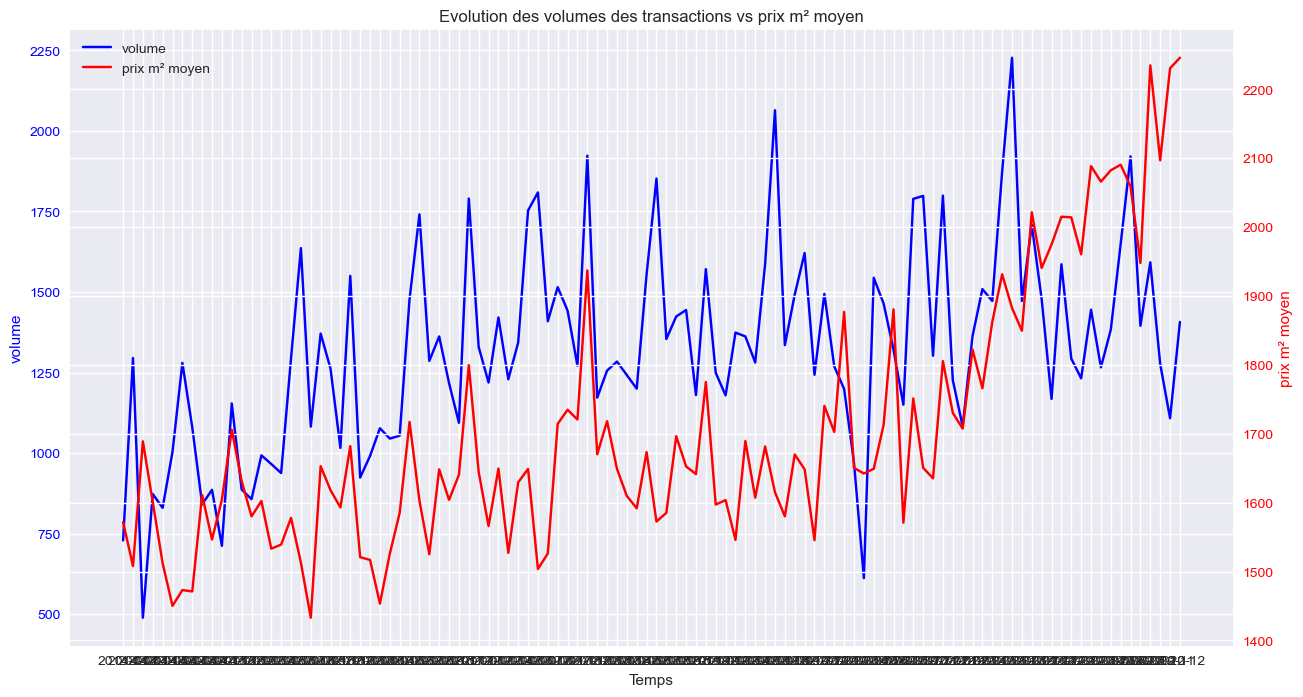

In [157]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume, color='b', label='volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat, color='r', label='prix m² moyen')
ax2.set_ylabel('prix m² moyen', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Evolution des volumes des transactions vs prix m² moyen')

plt.show()

In [158]:
import pandas as pd

#pour lisser les graphs
#resultat['prix_m2_smooth'] = resultat['prix_m2'].rolling(window=2).mean()
#volume['Volume de transaction/mois_smooth'] = volume['Volume de transaction/mois'].rolling(window=2).mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

#fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green')), secondary_y=False)
fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green'), connectgaps=True), secondary_y=False)

#fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/semaine'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink')), secondary_y=True)
fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/mois'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink'), connectgaps=True), secondary_y=True)

fig.update_layout(
    title='Graphique des volumes de transactions et prix m² moyen',
    xaxis=dict(title='Temps'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1100,  # Largeur de la figure en pixels
    height=600,  # Hauteur de la figure en pixels
    plot_bgcolor='light blue',  # Couleur de fond transparente
    paper_bgcolor='white',  # Couleur du papier transparente
    font=dict(color='black')
)

fig.show()


In [36]:
#relation inverse entre le volume des transactions et le prix moy du m2
#On remarque une saisonalité, les prix baissent entre février et Mai, le volume de transaction explose en Juillet

In [159]:
resultat["variation"]=(resultat["prix_m2"]-resultat["prix_m2"].shift())/resultat["prix_m2"].shift()

In [160]:
volume["variation"]=(volume["Volume de transaction/mois"]-volume["Volume de transaction/mois"].shift())/volume["Volume de transaction/mois"].shift()

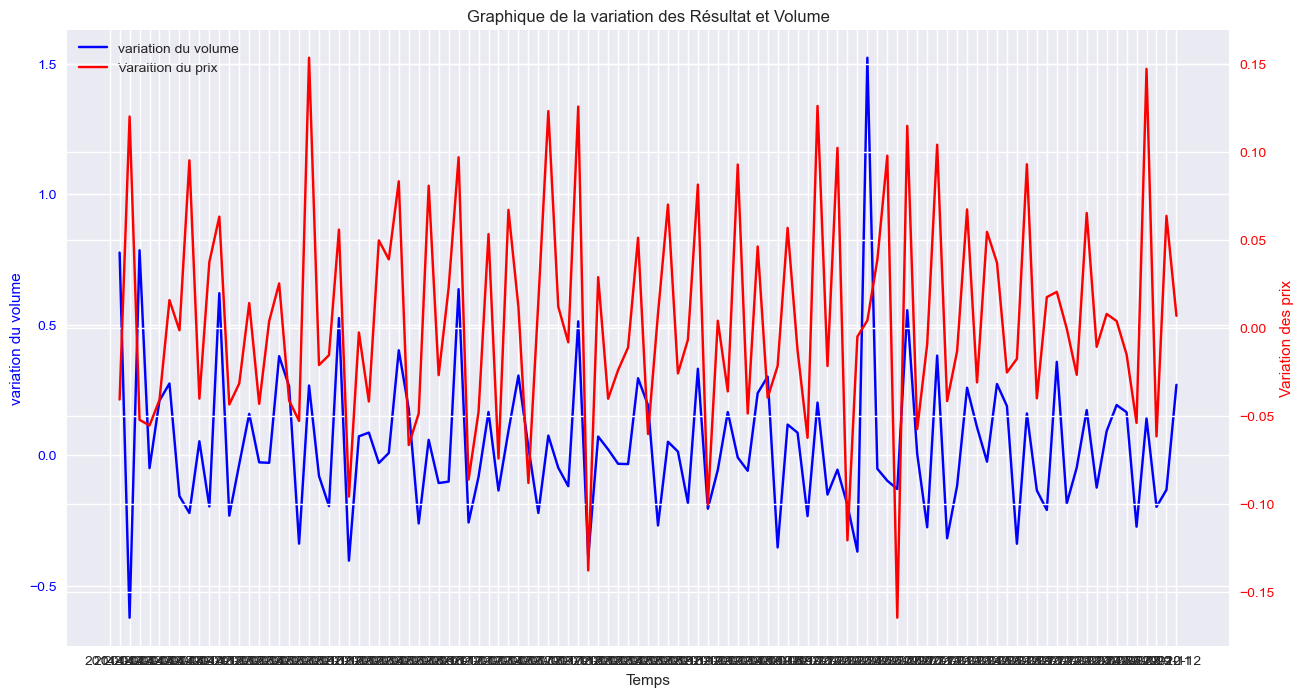

In [161]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume.variation, color='b', label='variation du volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('variation du volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat.variation, color='r', label='Varaition du prix')
ax2.set_ylabel('Variation des prix', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Graphique de la variation des Résultat et Volume')

plt.show()



In [162]:
resultat["sma_4"]=resultat["prix_m2"].rolling(4).mean()
resultat["sma_12"]=resultat["prix_m2"].rolling(12).mean()
resultat["position"]=np.where(resultat["sma_4"]>resultat["sma_12"],1,-1)


In [163]:
volume["sma_4"]=volume["Volume de transaction/mois"].rolling(4).mean()
volume["sma_12"]=volume["Volume de transaction/mois"].rolling(12).mean()
volume["position"]=np.where(volume["sma_4"]>resultat["sma_12"],1,-1)

In [164]:
resultat.dropna()

,prix_m2,variation,sma_4,sma_12,position
annee_mois,,,,,
2014-12,1705.811939,0.063220,1616.997909,1562.056262,1
2015-01,1631.606890,-0.043501,1622.080205,1567.032140,1
2015-02,1580.127903,-0.031551,1630.482270,1573.045264,1
2015-03,1602.462510,0.014135,1630.002310,1565.827339,1
2015-04,1533.298949,-0.043161,1586.874063,1560.194847,1
...,...,...,...,...,...
2022-08,1947.994597,-0.053979,2045.059257,2021.806322,1
2022-09,2234.743270,0.147202,2083.124425,2039.570205,1
2022-10,2097.001976,-0.061636,2084.721514,2052.593670,1


In [165]:
volume.dropna()

,Volume de transaction/mois,variation,sma_4,sma_12,position
annee_mois,,,,,
2014-12,1154,0.620787,898.250000,931.083333,-1
2015-01,887,-0.231369,909.750000,944.250000,-1
2015-02,857,-0.033822,902.500000,907.750000,-1
2015-03,993,0.158693,972.750000,949.750000,-1
2015-04,966,-0.027190,925.750000,957.500000,-1
...,...,...,...,...,...
2022-08,1395,-0.273816,1587.000000,1460.333333,-1
2022-09,1592,0.141219,1639.250000,1450.666667,-1
2022-10,1277,-0.197864,1546.250000,1433.916667,-1


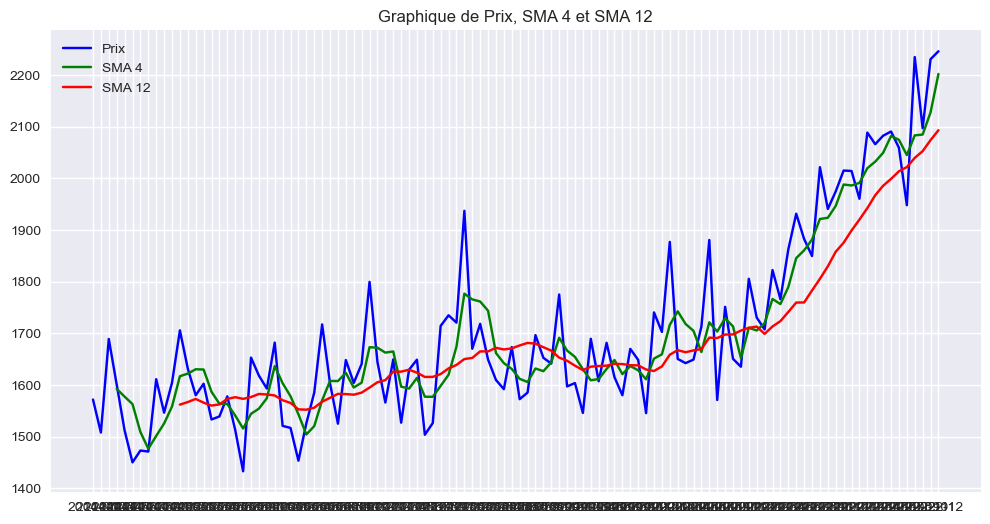

In [166]:

plt.figure(figsize=(12, 6))

plt.plot(resultat["prix_m2"], label='Prix', color='blue')

plt.plot(resultat.sma_4, label='SMA 4', color='green')

plt.plot(resultat.sma_12, label='SMA 12', color='red')

plt.legend()

plt.title('Graphique de Prix, SMA 4 et SMA 12')

plt.show()


In [167]:

# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["prix_m2"], mode='lines', name='Prix', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_4"], mode='lines', name='prix m² / 4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_12"], mode='lines', name='prix m²/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Prix, prix m²/4m et prix m²/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()


In [168]:


# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=volume.index, y=volume["Volume de transaction/mois"], mode='lines', name='volume des transactions', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_4"], mode='lines', name='volume moy /4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_12"], mode='lines', name='volume moy/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Volume de transaction, volume moy/4m et volume moy/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()

In [169]:
volume.dropna()

,Volume de transaction/mois,variation,sma_4,sma_12,position
annee_mois,,,,,
2014-12,1154,0.620787,898.250000,931.083333,-1
2015-01,887,-0.231369,909.750000,944.250000,-1
2015-02,857,-0.033822,902.500000,907.750000,-1
2015-03,993,0.158693,972.750000,949.750000,-1
2015-04,966,-0.027190,925.750000,957.500000,-1
...,...,...,...,...,...
2022-08,1395,-0.273816,1587.000000,1460.333333,-1
2022-09,1592,0.141219,1639.250000,1450.666667,-1
2022-10,1277,-0.197864,1546.250000,1433.916667,-1


In [171]:
colonnes_selectionnees = ['surface_habitable', 'n_pieces','prix_m2']
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

departement[colonnes_selectionnees].describe()


,surface_habitable,n_pieces,prix_m2
count,128603.000000,128603.000000,128603.000000
mean,88.019572,3.803931,1371.251493
std,41.760885,1.583896,1113.933248
min,4.000000,0.000000,0.000000
25%,61.000000,3.000000,318.038659
50%,81.000000,4.000000,1142.857143
75%,110.000000,5.000000,2325.000000
max,1528.000000,32.000000,3713.636364


<Axes: xlabel='surface_habitable', ylabel='Count'>

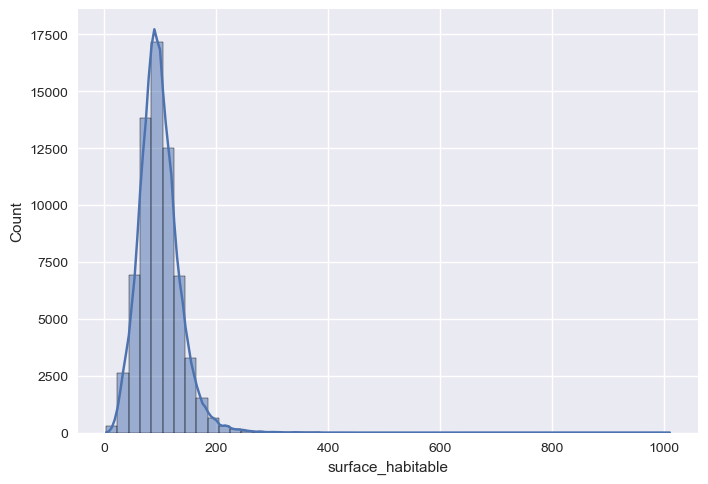

In [211]:
sns.histplot(x=departement.loc[departement["type_batiment"] == "Maison", 'surface_habitable'], kde=True, bins=50)


In [173]:
sns.histplot((x = departement.loc[departement["type_batiment"] = "Maison"]).['surface_habitable'],  kde = True, bins = 50).set_title('surface habitable')


SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1877233110.py, line 1)

Text(0.5, 1.0, 'Nombre de pièces')

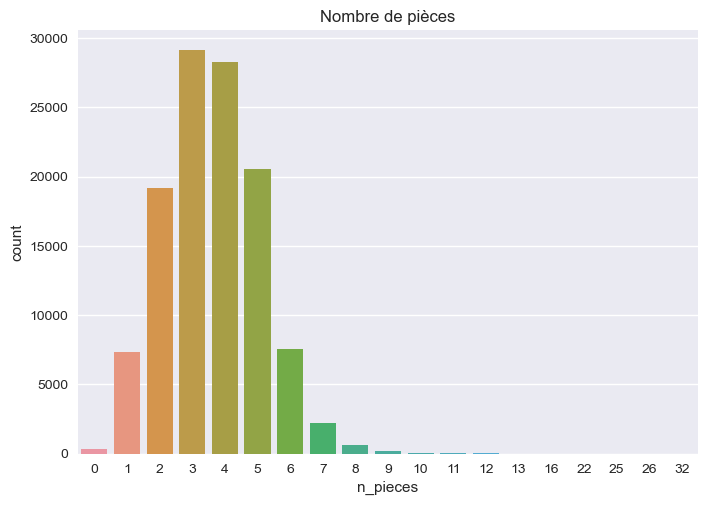

In [208]:
sns.countplot(x = 'n_pieces', data = departement).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nombre de pièces')

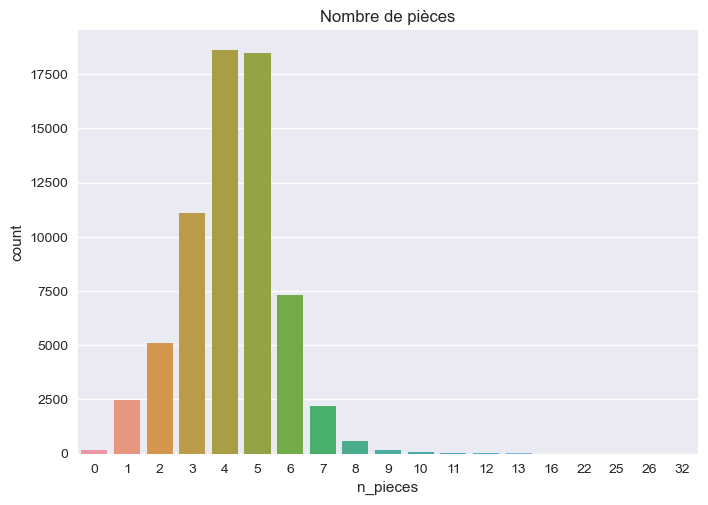

In [207]:
sns.countplot(x = 'n_pieces', data = departement.loc[departement["type_batiment"] == "Maison"]).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nature du bien')

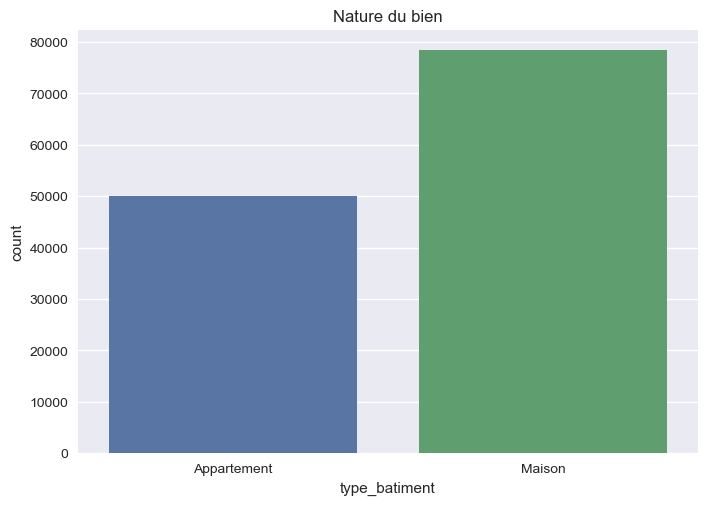

In [176]:
sns.countplot(x='type_batiment',data=departement).set_title('Nature du bien')


In [59]:
data1 = data[data["departement"]==75]

In [60]:
data1.index=data1["date_transaction"]

In [61]:
data1 = data1.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)



In [62]:
appartement = departement[departement["type_batiment"] == "Appartement"]


In [63]:
appartement['date_transaction'] = pd.to_datetime(appartement['date_transaction'])
appartement['annee_mois'] = appartement['date_transaction'].dt.strftime('%Y-%m')
volume_appartement = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume_appartement, on='annee_mois', how='right')

C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\283319388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_14208\283319388.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='surface_habitable', ylabel='prix'>

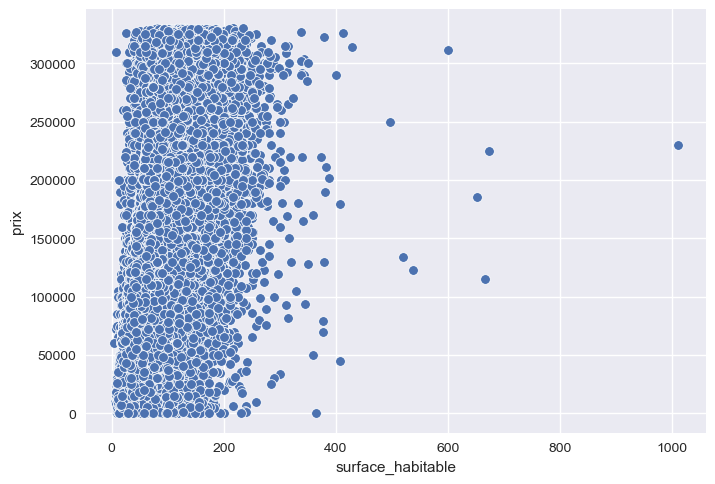

In [203]:
sns.scatterplot(x = 'surface_habitable', y = 'prix', data = departement)


<Axes: xlabel='surface_habitable', ylabel='prix'>

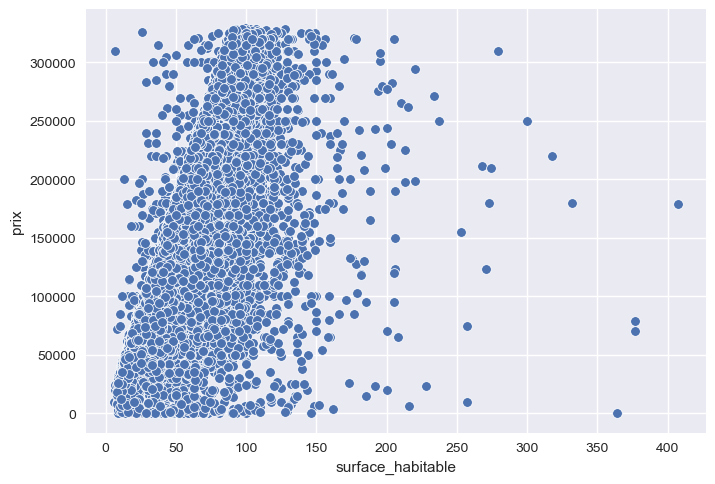

In [199]:
sns.scatterplot(x = 'surface_habitable', y = 'prix', data = departement.loc[departement["type_batiment"] == "Appartement"])


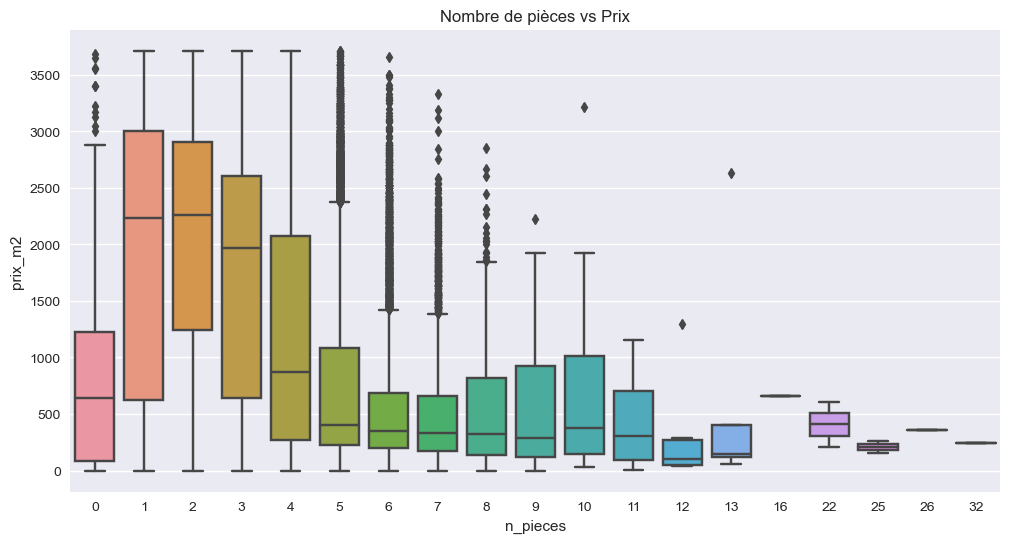

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez la boîte à moustaches (boxplot)
plt.figure(figsize=(12, 6))  # Définissez la taille de la figure
sns.boxplot(x='n_pieces', y='prix_m2', data=departement)
plt.title('Nombre de pièces vs Prix')

# Affichez le graphe
plt.show()


In [67]:
import plotly.express as px

# Supposons que vous ayez un DataFrame appelé 'data' avec les colonnes 'ville', 'ventes' et des données géographiques
# Assurez-vous d'avoir les données géographiques appropriées, par exemple les coordonnées géographiques des villes.

fig = px.scatter_geo(departement, 
                     locations="Ville", 
                     color="Volume de transaction/mois",
                     size="Volume de transaction/mois",
                     projection="natural earth",
                     title="Nombre de ventes de maisons par ville en France",
                     template="plotly",
                     color_continuous_scale="Viridis"
                    )

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="lightgray")

fig.show()


ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville', 'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces', 'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude', 'surface_dependances', 'surface_locaux_industriels', 'surface_terrains_agricoles', 'surface_terrains_sols', 'surface_terrains_nature', 'surface_totale', 'prix_m2_x', 'annee_mois', 'Volume de transaction/mois_x', 'moy prix m²/mois', 'Volume de transaction/mois_y'] but received: Volume de transaction/mois